# Importando Bibliotecas

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected=True)

# Análise de Dados

In [2]:
dados = pd.read_csv('Mall_Customers.csv')
# Para fazer cópia do DataFrame dados.to_csv('dados_copia/Mall_Customers.csv')

In [3]:
dados

,Unnamed: 0,CustomerID,Sex,Age,Annual Income (k$),Spending Score (1-100)
0,0,1,Male,19,15,39
1,1,2,Male,21,15,81
2,2,3,Female,20,16,6
3,3,4,Female,23,16,77
4,4,5,Female,31,17,40
...,...,...,...,...,...,...
195,195,196,Female,35,120,79
196,196,197,Female,45,126,28
197,197,198,Male,32,126,74
198,198,199,Male,32,137,18


In [4]:
# Verificando o tamanho da base de dados
dados.shape

(200, 6)

In [5]:
# Estatística descritiva
dados.describe()

,Unnamed: 0,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,99.500000,100.500000,38.850000,60.560000,50.200000
std,57.879185,57.879185,13.969007,26.264721,25.823522
min,0.000000,1.000000,18.000000,15.000000,1.000000
25%,49.750000,50.750000,28.750000,41.500000,34.750000
50%,99.500000,100.500000,36.000000,61.500000,50.000000
75%,149.250000,150.250000,49.000000,78.000000,73.000000
max,199.000000,200.000000,70.000000,137.000000,99.000000


In [6]:
# Tipos de dados
dados.dtypes

Unnamed: 0                 int64
CustomerID                 int64
Sex                       object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
# Verificando os registros nulos
dados.isnull().sum()


Unnamed: 0                0
CustomerID                0
Sex                       0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Visualização dos dados

In [8]:
plt.style.use('fivethirtyeight')

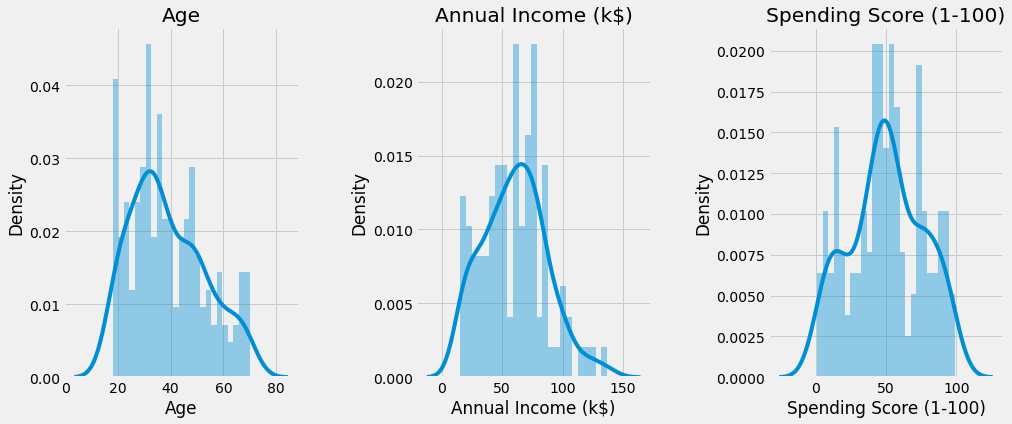

In [9]:
# Verificando as distribuição dos dados
plt.figure(1, figsize = (15, 6))
n = 0
for x in [ 'Age', 'Annual Income (k$)','Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(dados[x], bins = 25)
    plt.title('{}'.format(x))
plt.show()

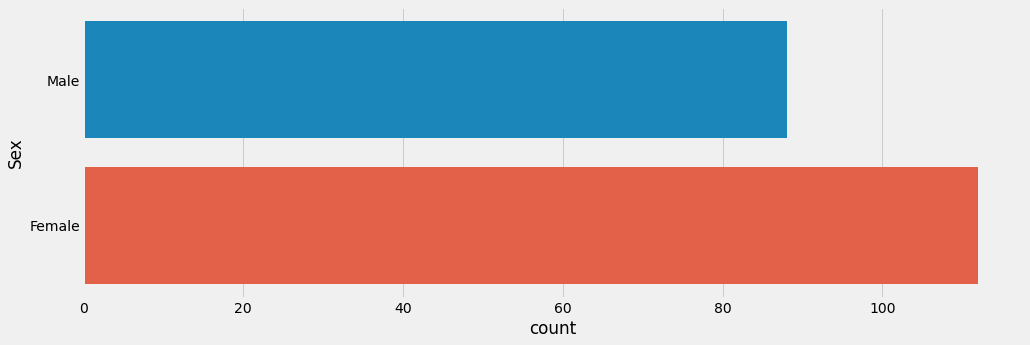

In [10]:
# Contagem de amostras de registros por sexo
plt.figure(1 , figsize= (15, 5))
sns.countplot(y = 'Sex' , data= dados )
plt.show()

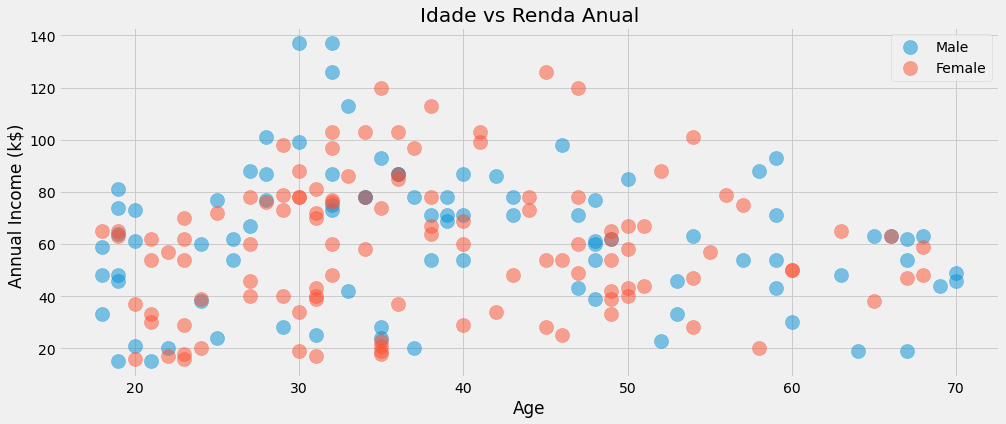

In [11]:
# Renda anual vs Pontuação de gastos

plt.figure(1 , figsize= (15, 6))
for sex in ['Male', 'Female']:
    plt.scatter(x ='Age' , y = 'Annual Income (k$)' , data = dados[dados['Sex'] == sex],
                s = 200 , alpha = 0.5 , label = sex)
plt.xlabel('Age'),plt.ylabel('Annual Income (k$) ')
plt.title('Idade vs Renda Anual')
plt.legend()
plt.show()

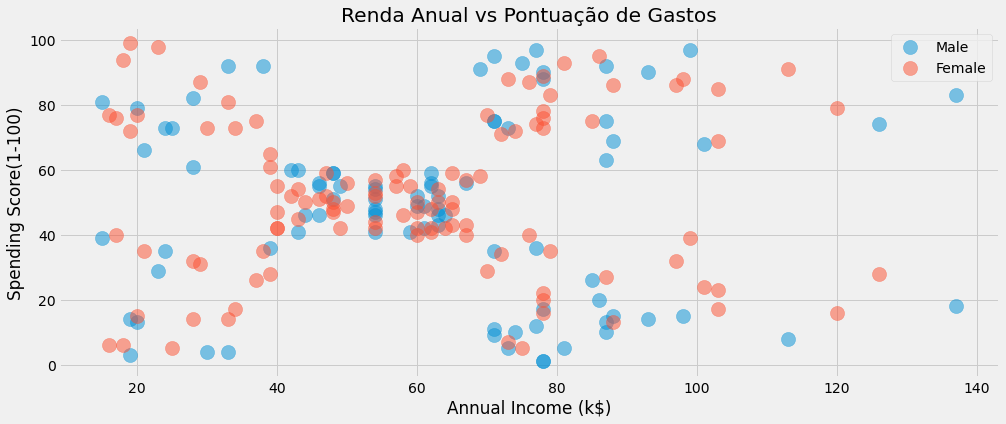

In [12]:
# Renda anual vs Pontuação de gastos
plt.figure(1 , figsize = (15, 6))
for sex in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',
                data = dados[dados['Sex'] == sex] ,s = 200 , alpha = 0.5 , label = sex)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score(1-100)')
plt.title('Renda Anual vs Pontuação de Gastos')
plt.legend()
plt.show()

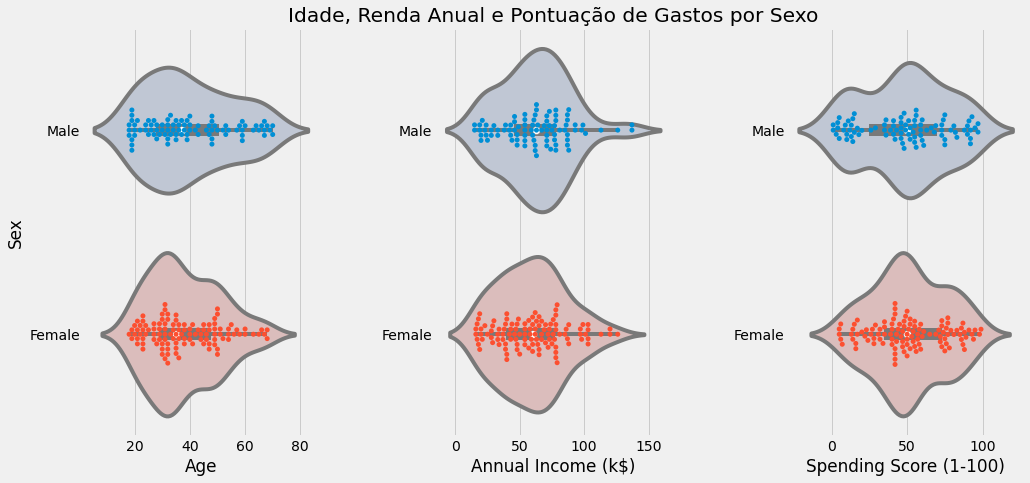

In [13]:
# Distribuição de Idade, Renda anual e Pontuação de gastos segmentado por sexo

plt.figure(1 , figsize= (15, 7))
n = 0
for cols in ['Age' ,'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3 , n)
    plt.subplots_adjust(hspace= 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Sex' , data = dados, palette = 'vlag')
    sns.swarmplot(x= cols , y = 'Sex' , data= dados)
    plt.ylabel('Sex' if n == 1 else '')
    plt.title('Idade, Renda Anual e Pontuação de Gastos por Sexo' if n == 2 else '')
plt.show()

# Agrupamento de dados utilizando o K-Means

In [14]:
# Selecionando o número de clusters através do método Elbow(Soma das distâncias quadráticas intra clusters).
X2 = dados [['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:, :].values
inertia = []
for n in range(1, 11):
    algorithm = (KMeans(n_clusters= n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

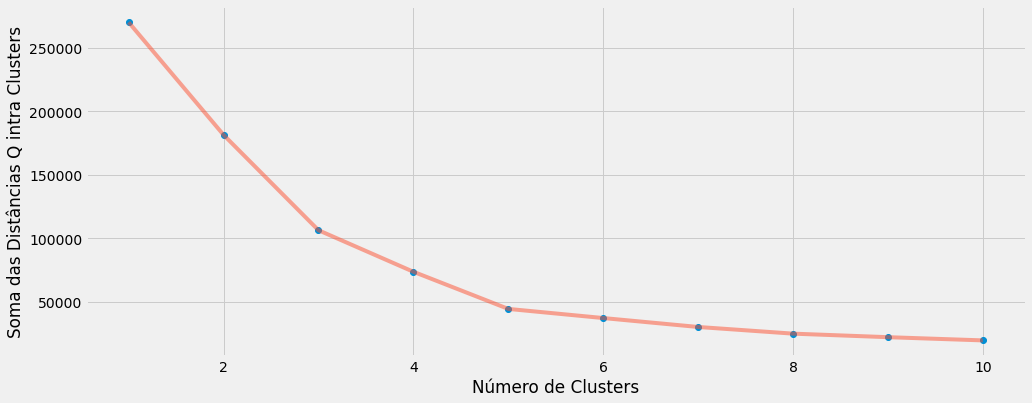

In [15]:
plt.figure(1 , figsize= (15, 6))
plt.plot(np.arange(1, 11), inertia , 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

# De acordo com o gráfico abaixo o valor ideal é 4, pois a partir dele há 'quebra'(Elbow) 

In [19]:
# Inicializando e Computando o KMeans com o valor de 4 clusters
algorithm = (KMeans(n_clusters= 4))
algorithm.fit(X2)

KMeans(algorithm= 'auto', copy_x=True, init='k-means++', max_iter=300,
      n_clusters = 4, n_init = 10, n_jobs=None, precompute_distances = 'auto',
      random_state = None, tol= 0.0001, verbose=0)

KMeans(n_clusters=4, n_jobs=None, precompute_distances='auto')

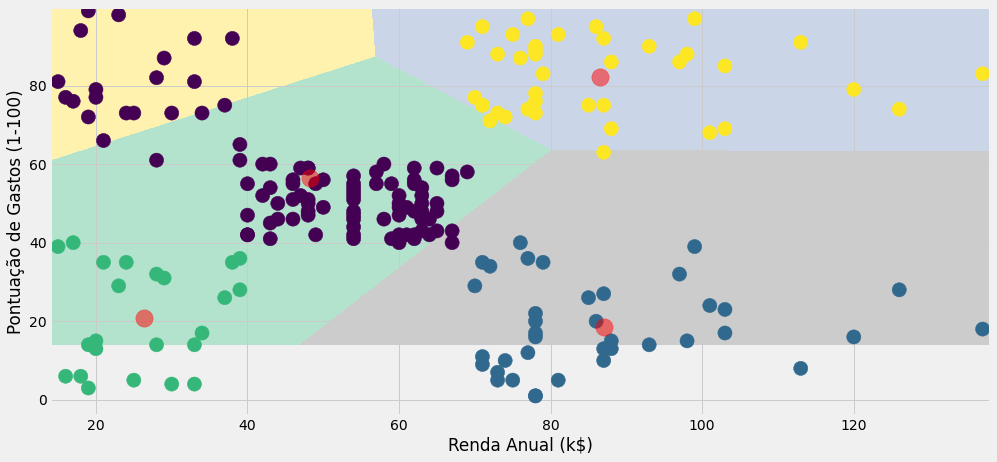

In [40]:
# Visualizando os grupos criados e seus centroides(Ponto do centro,ponto referência)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 0].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

plt.figure(1, figsize= (15, 7))
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap = plt.cm.Pastel2, aspect = 'auto',origin=None)
plt.scatter( x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = dados, c = labels2, s = 200)
plt.scatter(x = centroids2 [: , 0], y = centroids2 [: , 1] , s = 300 , c = 'red' , alpha= 0.5)
plt.ylabel('Pontuação de Gastos (1-100)'), plt.xlabel('Renda Anual (k$)')
plt.show()

# Analisando os dados agrupados

In [41]:
dados['clusters'] = algorithm.labels_ # Método do scikitlearn que mostra qual grupo a amostra foi atribuida

In [42]:
dados.head()

,Unnamed: 0,CustomerID,Sex,Age,Annual Income (k$),Spending Score (1-100),clusters
0,0,1,Male,19,15,39,2
1,1,2,Male,21,15,81,0
2,2,3,Female,20,16,6,2
3,3,4,Female,23,16,77,0
4,4,5,Female,31,17,40,2


In [43]:
dados_group = dados.drop(['CustomerID','Age'], axis=1).groupby('clusters') # Excluindo alguns atributos e fazendo agrupamento

In [44]:
dados_group.describe()

Unnamed: 0                                                          \
              count    mean        std    min     25%    50%     75%    max   
clusters                                                                      
0             100.0   69.97  33.026605    1.0   47.75   72.5   97.25  122.0   
1              38.0  161.00  22.226111  124.0  142.50  161.0  179.50  198.0   
2              23.0   22.00  13.564660    0.0   11.00   22.0   33.00   44.0   
3              39.0  161.00  22.803509  123.0  142.00  161.0  180.00  199.0   

         Annual Income (k$)             ...                \
                      count       mean  ...    75%    max   
clusters                                ...                 
0                     100.0  48.260000  ...  60.25   69.0   
1                      38.0  87.000000  ...  96.00  137.0   
2                      23.0  26.304348  ...  33.00   39.0   
3                      39.0  86.538462  ...  95.00  137.0   

         Spending Score (1-100)                                           \
                          count       mean        std   min    25%   50%   
clusters                                                                   
0                         100.0  56.480000  14.190963  40.0  46.75  52.5   
1                          38.0  18.631579  10.915947   1.0  10.25  16.5   
2                          23.0  20.913043  13.017167   3.0   9.50  17.0   
3                          39.0  82.128205   9.364489  63.0  74.50  83.0   

                       
            75%   max  
clusters               
0         60.00  99.0  
1         26.75  40.0  
2         33.50  40.0  
3         90.00  97.0  

[4 rows x 24 columns]